In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda i: ast.literal_eval(i) if pd.notna(i) else i)

df_DA=df[df['job_title_short']=='Data Analyst'].copy()

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


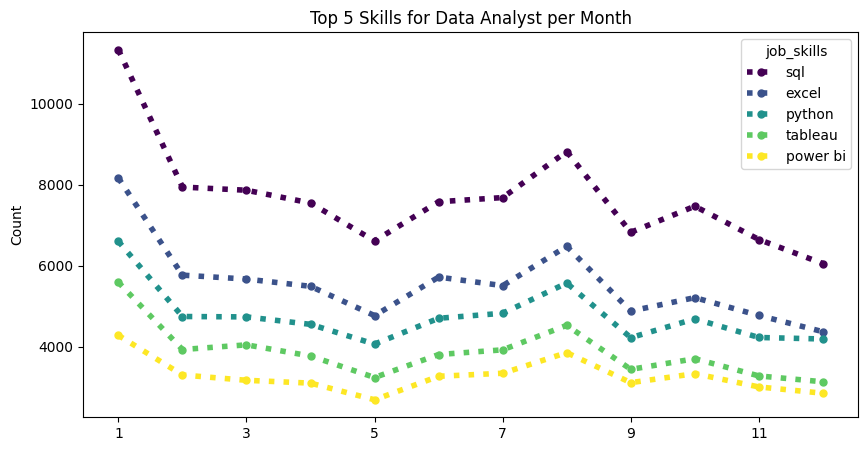

In [10]:
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month

df_DA_explode=df_DA.explode('job_skills')

df_DA_pivot=df_DA_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_DA_pivot.loc['Total']=df_DA_pivot.sum()

df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot=df_DA_pivot.drop('Total')

df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10,5)
)

plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [17]:
# !pip install adjustText
from adjustText import adjust_text

In [23]:
df_exploded=df.explode('job_skills')

skill_stats=df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats=skill_stats.sort_values(by='skill_count', ascending=False).head(20)
skill_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


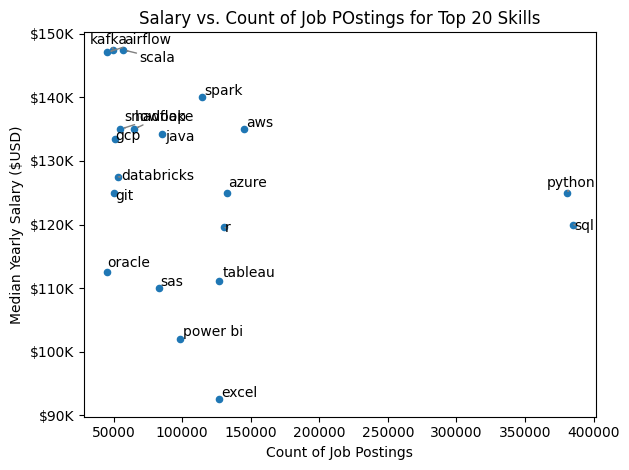

In [29]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job POstings for Top 20 Skills')
plt.tight_layout()

plt.show()